<a href="https://colab.research.google.com/github/AndreaBravo52/AlgoritmosClasificacion/blob/main/BREAST_CANCER_LOG_REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion logistica

base de datos de cancer de mama de la universidad de wisconsin de kaggle:
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
data=pd.read_csv('drive/MyDrive/breastcancer.csv')

In [ ]:
data.shape

(569, 33)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


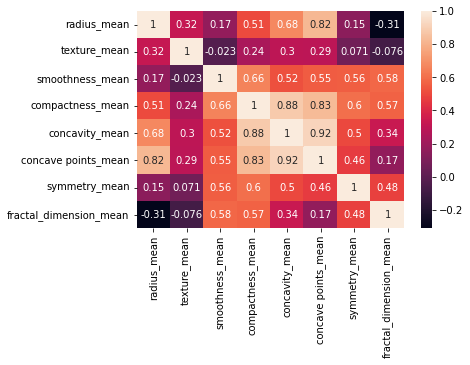

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
data.drop(data.iloc[:,12:33], inplace=True, axis=1)
data.drop('id',inplace=True, axis=1)
data.drop('area_mean',inplace=True, axis=1)
data.drop('perimeter_mean',inplace=True, axis=1)#quitar area y perimetro porque son dependientes de radio y queremos variables independientes

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
X=data.drop('diagnosis', axis=1)
y=data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[63  4]
 [ 6 41]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.91      0.94      0.93        67
           M       0.91      0.87      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

